In [40]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

In [42]:
### Read CSV
import csv
with open('techism-events.csv', 'r') as f:
    events = list(csv.reader(f))
#len(events)
#events[1]

In [43]:
### Read CSV into pandas dataframe and parse dates
#df = pd.read_csv('https://www.techism.de/static/export/techism-events.csv', parse_dates=['date_time_begin', 'date_time_end'])
df = pd.read_csv('techism-events.csv', parse_dates=['date_time_begin', 'date_time_end'])

In [23]:
### Play with dataframe
#df.head()
#df.columns
#df.dtypes
#df.ix[1]

In [24]:
### Statistics about columns
#df.location_lat.describe()
#df.date_time_begin.describe()
#df.date_time_end.describe()
#df.title.describe()

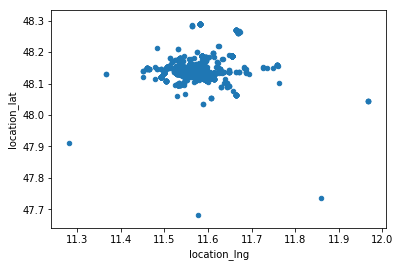

In [25]:
### Visualize geo coordinates
##df.location_lat.hist()
##df.location_lng.hist()
##df.iloc[df.location_lng.idxmax()]
df.plot.scatter(x='location_lng', y='location_lat');

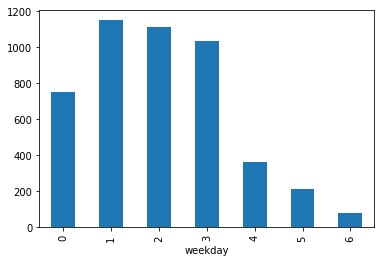

In [39]:
### Events per weekday
df['weekday'] = df.date_time_begin.dt.weekday
df['weekday_name'] = df.date_time_begin.dt.weekday_name
wd = df.groupby('weekday')['title'].count()
wd.plot(kind='bar')

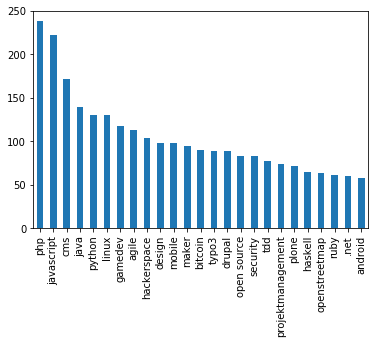

In [27]:
### Tags usage
### Source: https://stackoverflow.com/questions/17116814/pandas-how-do-i-split-text-in-a-column-into-multiple-rows
tag = df['tags'].str.split('|').apply(Series, 1).stack()
tag.index = tag.index.droplevel(-1)
tag.name = 'tag'
df2 = df.join(tag)
df2['tag'].value_counts().nlargest(25).plot(kind='bar')

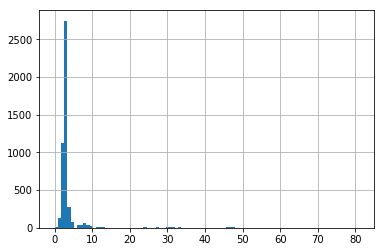

In [28]:
### Duration of an event
df['duration'] = (df.date_time_end - df.date_time_begin).astype('timedelta64[h]')
df['duration'] = df['duration'].fillna(3)
df['duration'].describe()
df[df['duration']<96]['duration'].hist(bins=96)